In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv ('/content/drive/MyDrive/PUST Research Group1/04 Diabetes prediction/Dataset/01 diabetes_prediction_dataset.csv')
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


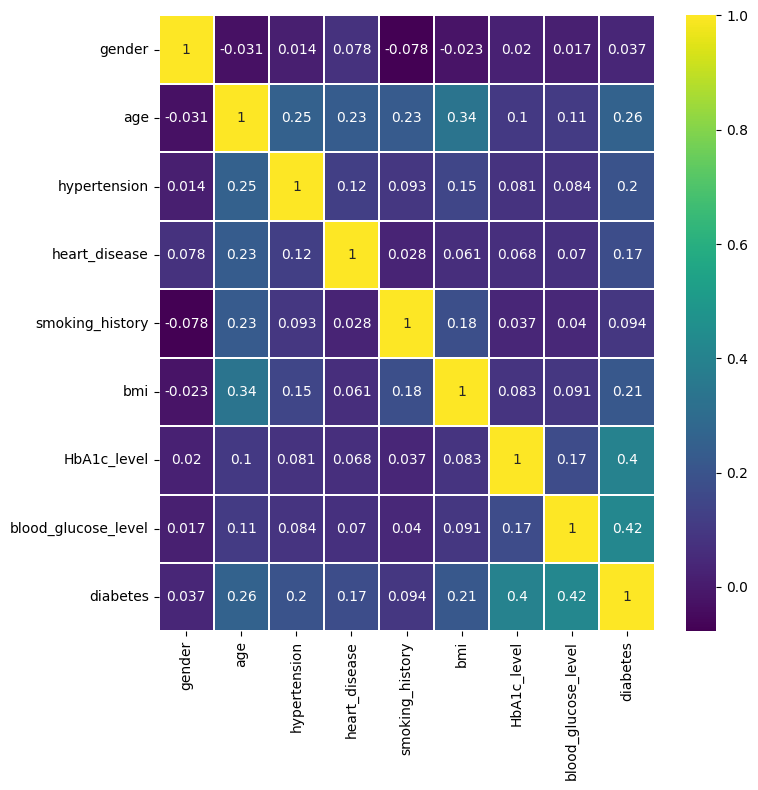

In [ ]:
plt.figure(figsize=(8,8))
# sns.heatmap(diabetes_data.corr(), annot=True,cmap ='RdYlGn')
sns.heatmap(df.corr(),annot=True, cmap='viridis',linewidths=.1)
plt.show()

In [ ]:
df['gender'].replace({'Female':0, 'Male':1, 'Other':2}, inplace=True)
df['smoking_history'].replace({'No Info':0, 'current':1, 'ever':2, 'former':3, 'never':4, 'not current':5}, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [ ]:
X = df.drop(['diabetes', 'smoking_history','gender'], axis =1)
#X = df.drop(['diabetes'], axis =1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,80.0,0,1,25.19,6.6,140
1,54.0,0,0,27.32,6.6,80
2,28.0,0,0,27.32,5.7,158
3,36.0,0,0,23.45,5.0,155
4,76.0,1,1,20.14,4.8,155
...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90
99996,2.0,0,0,17.37,6.5,100
99997,66.0,0,0,27.83,5.7,155
99998,24.0,0,0,35.42,4.0,100


In [ ]:
# RandomForestClassifier_ with 2 less features

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}
model = RandomForestClassifier()

k_folds = KFold(n_splits = 5)
results = cross_validate(model, X, y, cv = k_folds,scoring=scoring)
print('test accuracy: ',np.mean(results['test_accuracy'])*100, '+-',np.std(results['test_accuracy'])*100)
print('test precision: ',np.mean(results['test_precision'])*100, '+-',np.std(results['test_precision'])*100)
print('test recall: ',np.mean(results['test_recall'])*100, '+-',np.std(results['test_recall'])*100)
print('test f1_score: ',np.mean(results['test_f1_score'])*100, '+-',np.std(results['test_f1_score'])*100)

test accuracy:  96.811 +- 0.1578416928444464
test precision:  90.72049597612833 +- 1.06133279394746
test recall:  69.63218331623372 +- 1.400231374063124
test f1_score:  78.77519319227169 +- 0.8101075100598751


In [ ]:
# RandomForestClassifier_

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}
model = RandomForestClassifier()

k_folds = KFold(n_splits = 5)
results = cross_validate(model, X, y, cv = k_folds,scoring=scoring)
print('test accuracy: ',np.mean(results['test_accuracy'])*100, '+-',np.std(results['test_accuracy'])*100)
print('test precision: ',np.mean(results['test_precision'])*100, '+-',np.std(results['test_precision'])*100)
print('test recall: ',np.mean(results['test_recall'])*100, '+-',np.std(results['test_recall'])*100)
print('test f1_score: ',np.mean(results['test_f1_score'])*100, '+-',np.std(results['test_f1_score'])*100)

test accuracy:  96.99600000000001 +- 0.15061208450851726
test precision:  94.52976138133735 +- 0.7177222361062144
test recall:  68.64774408540228 +- 1.2057808803279122
test f1_score:  79.52752814490607 +- 0.7835080808375725


In [ ]:
# #AdaBoost with 2 less features

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}
model = AdaBoostClassifier ()

k_folds = KFold(n_splits = 5)
results = cross_validate(model, X, y, cv = k_folds,scoring=scoring)
print('test accuracy: ',np.mean(results['test_accuracy'])*100, '+-',np.std(results['test_accuracy'])*100)
print('test precision: ',np.mean(results['test_precision'])*100, '+-',np.std(results['test_precision'])*100)
print('test recall: ',np.mean(results['test_recall'])*100, '+-',np.std(results['test_recall'])*100)
print('test f1_score: ',np.mean(results['test_f1_score'])*100, '+-',np.std(results['test_f1_score'])*100)

test accuracy:  97.20400000000001 +- 0.18900793634130894
test precision:  97.91343153630542 +- 0.2683419038298447
test recall:  68.59690042612156 +- 1.512000989558288
test f1_score:  80.66403479262725 +- 1.038453936750576


In [ ]:
# #AdaBoost

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}
model = AdaBoostClassifier ()

k_folds = KFold(n_splits = 5)
results = cross_validate(model, X, y, cv = k_folds,scoring=scoring)
print('test accuracy: ',np.mean(results['test_accuracy'])*100, '+-',np.std(results['test_accuracy'])*100)
print('test precision: ',np.mean(results['test_precision'])*100, '+-',np.std(results['test_precision'])*100)
print('test recall: ',np.mean(results['test_recall'])*100, '+-',np.std(results['test_recall'])*100)
print('test f1_score: ',np.mean(results['test_f1_score'])*100, '+-',np.std(results['test_f1_score'])*100)

test accuracy:  97.186 +- 0.1747970251463129
test precision:  97.0214146300869 +- 0.49245392271820704
test recall:  69.04112215054039 +- 1.4894533292880863
test f1_score:  80.66226727353737 +- 0.960574644544674


In [ ]:
# #Gradient Tree Boosting 2 less features
from sklearn.ensemble import GradientBoostingClassifier
scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}
model = GradientBoostingClassifier()

k_folds = KFold(n_splits = 5)
results = cross_validate(model, X, y, cv = k_folds,scoring=scoring)
print('test accuracy: ',np.mean(results['test_accuracy'])*100, '+-',np.std(results['test_accuracy'])*100)
print('test precision: ',np.mean(results['test_precision'])*100, '+-',np.std(results['test_precision'])*100)
print('test recall: ',np.mean(results['test_recall'])*100, '+-',np.std(results['test_recall'])*100)
print('test f1_score: ',np.mean(results['test_f1_score'])*100, '+-',np.std(results['test_f1_score'])*100)

test accuracy:  97.2 +- 0.20231164079211977
test precision:  98.61639465914823 +- 0.2883128634775683
test recall:  68.04561440678523 +- 1.4628878744553488
test f1_score:  80.51932139515448 +- 1.0867814075632845


In [ ]:
#checking other way
#Gradient Tree Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score,precision_score,recall_score

kf = KFold(n_splits=5)
X = np.array(X)
y = np.array(y)
accuracy = []
precision = []
recall = []
f1 = []

for fold, (train_index, test_index) in enumerate(kf.split(X,y), 1):
    X_train = X[train_index]
    y_train = y[train_index]  # Based on your code, you might need a ravel call here, but I would look into how you're generating your y
    X_test = X[test_index]
    y_test = y[test_index]  # See comment on ravel and  y_train
    #sm = SMOTE(sampling_strategy=0.75)
    #X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
    model = GradientBoostingClassifier()  # Choose a model here
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'For fold {fold}:')
    accuracy.append(model.score(X_test, y_test))
    print(f'Accuracy: {accuracy[-1]}')
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))
    #print(f'f-score: {f1_score(y_test, y_pred)}')
print('test accuracy: ',np.mean(accuracy)*100, '+-',np.std(accuracy)*100)
print('test precision: ',np.mean(precision)*100, '+-',np.std(precision)*100)
print('test recall: ',np.mean(recall)*100, '+-',np.std(recall)*100)
print('test f1_score: ',np.mean(f1)*100, '+-',np.std(f1)*100)

For fold 1:
Accuracy: 0.96975
For fold 2:
Accuracy: 0.9703
For fold 3:
Accuracy: 0.96885
For fold 4:
Accuracy: 0.9727
For fold 5:
Accuracy: 0.96985
test accuracy:  97.029 +- 0.12935996289424395
test precision:  93.50467327724613 +- 1.5439815408512672
test recall:  69.95690106150943 +- 1.3997057552031837
test f1_score:  80.01064381062498 +- 0.565941043521726


In [ ]:
# #Gradient Tree Boosting
from sklearn.ensemble import GradientBoostingClassifier
scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}
model = GradientBoostingClassifier()

k_folds = KFold(n_splits = 5)
results = cross_validate(model, X, y, cv = k_folds,scoring=scoring)
print('test accuracy: ',np.mean(results['test_accuracy'])*100, '+-',np.std(results['test_accuracy'])*100)
print('test precision: ',np.mean(results['test_precision'])*100, '+-',np.std(results['test_precision'])*100)
print('test recall: ',np.mean(results['test_recall'])*100, '+-',np.std(results['test_recall'])*100)
print('test f1_score: ',np.mean(results['test_f1_score'])*100, '+-',np.std(results['test_f1_score'])*100)

test accuracy:  97.22 +- 0.18563404860100538
test precision:  98.60486381793123 +- 0.3776715785902431
test recall:  68.28854968411864 +- 1.339333548347827
test f1_score:  80.68589077045402 +- 0.9727459211585548


In [ ]:
#Gaussian Naive Bayes with 2 less features
from sklearn.naive_bayes import GaussianNB

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}
model = GaussianNB()

k_folds = KFold(n_splits = 5)
results = cross_validate(model, X, y, cv = k_folds,scoring=scoring)
print('test accuracy: ',np.mean(results['test_accuracy'])*100, '+-',np.std(results['test_accuracy'])*100)
print('test precision: ',np.mean(results['test_precision'])*100, '+-',np.std(results['test_precision'])*100)
print('test recall: ',np.mean(results['test_recall'])*100, '+-',np.std(results['test_recall'])*100)
print('test f1_score: ',np.mean(results['test_f1_score'])*100, '+-',np.std(results['test_f1_score'])*100)

test accuracy:  90.324 +- 0.13249150916190863
test precision:  45.16694281821291 +- 1.0590960805154739
test recall:  64.53492238354298 +- 1.0326783972609541
test f1_score:  53.12309170284618 +- 0.49834480366908157


In [ ]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}
model = GaussianNB()

k_folds = KFold(n_splits = 5)
results = cross_validate(model, X, y, cv = k_folds,scoring=scoring)
print('test accuracy: ',np.mean(results['test_accuracy'])*100, '+-',np.std(results['test_accuracy'])*100)
print('test precision: ',np.mean(results['test_precision'])*100, '+-',np.std(results['test_precision'])*100)
print('test recall: ',np.mean(results['test_recall'])*100, '+-',np.std(results['test_recall'])*100)
print('test f1_score: ',np.mean(results['test_f1_score'])*100, '+-',np.std(results['test_f1_score'])*100)

test accuracy:  90.32600000000001 +- 0.14008568806269717
test precision:  45.18379815287275 +- 0.9489988867039324
test recall:  64.71234202265042 +- 1.024924138230993
test f1_score:  53.1970295186128 +- 0.42743960541619186


In [ ]:
#SVC   with 2 less features
from sklearn.svm import SVC

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}
model = SVC()

k_folds = KFold(n_splits = 5)
results = cross_validate(model, X, y, cv = k_folds,scoring=scoring)
print('test accuracy: ',np.mean(results['test_accuracy'])*100, '+-',np.std(results['test_accuracy'])*100)
print('test precision: ',np.mean(results['test_precision'])*100, '+-',np.std(results['test_precision'])*100)
print('test recall: ',np.mean(results['test_recall'])*100, '+-',np.std(results['test_recall'])*100)
print('test f1_score: ',np.mean(results['test_f1_score'])*100, '+-',np.std(results['test_f1_score'])*100)

test accuracy:  94.84899999999999 +- 0.20093282459568343
test precision:  99.9702823179792 +- 0.059435364041604544
test recall:  39.426560962498414 +- 0.6933918180255809
test f1_score:  56.54688062276121 +- 0.710087141222252


In [ ]:
#SVC
from sklearn.svm import SVC

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}
model = SVC()

k_folds = KFold(n_splits = 5)
results = cross_validate(model, X, y, cv = k_folds,scoring=scoring)
print('test accuracy: ',np.mean(results['test_accuracy'])*100, '+-',np.std(results['test_accuracy'])*100)
print('test precision: ',np.mean(results['test_precision'])*100, '+-',np.std(results['test_precision'])*100)
print('test recall: ',np.mean(results['test_recall'])*100, '+-',np.std(results['test_recall'])*100)
print('test f1_score: ',np.mean(results['test_f1_score'])*100, '+-',np.std(results['test_f1_score'])*100)

test accuracy:  94.80400000000002 +- 0.203479728720088
test precision:  99.9697428139183 +- 0.060514372163389396
test recall:  38.89781586251723 +- 0.6823042724113646
test f1_score:  56.00093789698883 +- 0.705302929272628


In [ ]:
#KNN with 2 less features
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}
model = KNeighborsClassifier()
k_folds = KFold(n_splits = 5)
results = cross_validate(model, X, y, cv = k_folds,scoring=scoring)
print('test accuracy: ',np.mean(results['test_accuracy'])*100, '+-',np.std(results['test_accuracy'])*100)
print('test precision: ',np.mean(results['test_precision'])*100, '+-',np.std(results['test_precision'])*100)
print('test recall: ',np.mean(results['test_recall'])*100, '+-',np.std(results['test_recall'])*100)
print('test f1_score: ',np.mean(results['test_f1_score'])*100, '+-',np.std(results['test_f1_score'])*100)

test accuracy:  95.52 +- 0.21085540068966757
test precision:  87.93319455931507 +- 1.1760077931648971
test recall:  54.87679501202953 +- 1.5306549047128784
test f1_score:  67.5557992108134 +- 0.9695875848727044


In [ ]:
#KNN
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}
model = KNeighborsClassifier()
k_folds = KFold(n_splits = 5)
results = cross_validate(model, X, y, cv = k_folds,scoring=scoring)
print('test accuracy: ',np.mean(results['test_accuracy'])*100, '+-',np.std(results['test_accuracy'])*100)
print('test precision: ',np.mean(results['test_precision'])*100, '+-',np.std(results['test_precision'])*100)
print('test recall: ',np.mean(results['test_recall'])*100, '+-',np.std(results['test_recall'])*100)
print('test f1_score: ',np.mean(results['test_f1_score'])*100, '+-',np.std(results['test_f1_score'])*100)

test accuracy:  95.27300000000001 +- 0.14256928140381625
test precision:  86.67412161007991 +- 1.3083792689296248
test recall:  52.47759634242799 +- 1.1005886542735495
test f1_score:  65.3570374204699 +- 0.6715787752075564


In [ ]:
#LDA with 2 less
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}
model = LinearDiscriminantAnalysis()
k_folds = KFold(n_splits = 5)
results = cross_validate(model, X, y, cv = k_folds,scoring=scoring)
print('test accuracy: ',np.mean(results['test_accuracy'])*100, '+-',np.std(results['test_accuracy'])*100)
print('test precision: ',np.mean(results['test_precision'])*100, '+-',np.std(results['test_precision'])*100)
print('test recall: ',np.mean(results['test_recall'])*100, '+-',np.std(results['test_recall'])*100)
print('test f1_score: ',np.mean(results['test_f1_score'])*100, '+-',np.std(results['test_f1_score'])*100)

test accuracy:  95.611 +- 0.17298554852934858
test precision:  85.14941951941 +- 0.7240705411004116
test recall:  58.59452892254231 +- 1.1026992981722246
test f1_score:  69.41158373685194 +- 0.8039865955260798


In [ ]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}
model = LinearDiscriminantAnalysis()
k_folds = KFold(n_splits = 5)
results = cross_validate(model, X, y, cv = k_folds,scoring=scoring)
print('test accuracy: ',np.mean(results['test_accuracy'])*100, '+-',np.std(results['test_accuracy'])*100)
print('test precision: ',np.mean(results['test_precision'])*100, '+-',np.std(results['test_precision'])*100)
print('test recall: ',np.mean(results['test_recall'])*100, '+-',np.std(results['test_recall'])*100)
print('test f1_score: ',np.mean(results['test_f1_score'])*100, '+-',np.std(results['test_f1_score'])*100)

test accuracy:  95.61800000000001 +- 0.158984275952058
test precision:  85.1520349962408 +- 0.6910789354516405
test recall:  58.687235888875065 +- 0.9964549978101391
test f1_score:  69.47840951366689 +- 0.713389054802726
